<a href="https://colab.research.google.com/github/anderson-fm/Chernobyl-Analysis/blob/main/chernobyl_blogpost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <br>


# Analysis of the Chernobyl Disaster influence in Air Contamination

### Anderson Alves

#### *September, 2020*

<br>
<small>This project is done as part of the course <i>Data Analysis with Python: Zero to Pandas</i> , lectured by Aakash N. S., and hosted on <a href="https://jovian.ml">Jovian.ml</a>.</small>


### Context <br>

<div style="text-align: justify"> The Chernobyl disaster started in 1986's April 26th, when the Chernobyl's nuclear power plant reactor caught on fire, lasting for 10 days, resulting in the unprecedented release of radioactive material from a nuclear reactor. The power plant is located at 100 km from Kievin (Ukraine), but the effects of this accident reached far beyond its country borders.</div> <br>

<div style="text-align: justify"> The three most affected countries were Belarus, the Russian Federation, and Ukraine, but the accident's consequences were not limited to those territories. Several other European countries were affected by it, due to a massive atmospheric transfer of radioactive material. Until this day, the real impact of this event is still under controversy.</div> <br>

<div style="text-align: justify"> The assessment of the radionuclide intake with food and drinking water was based primarily on several measurements of I-131, Cs-134, and Cs-137 that were performed all over Europe [1], which are the radioisotopes reported in this dataset.</div> <br>


### Dataset Content

This dataset presents concentration of Iodine-131 (I-131), Caesium-134 (Cs-134) and Caesium-137 (Cs-137) as aerosol particles which were measured in specific location and date. The following information is given in each column:
  -  country
  -  country code
  -  locality name
  -  lattitude (degrees.hundredths of degrees)
  -  longitude (degrees.hundredths of degrees)
  -  date (year/month/day)
  -  hour of end of sampling (hours:minutes)
  -  duration (hours.minutes)
  -  I-131 concentration in Bq/m3 (aerosol particles)
  -  Cs-134 concentration in Bq/m3 (aerosol particles)
  -  Cs-137 concentration in Bq/m3 (aerosol particles)
  
### Acknowledgements

The dataset was extracted from REM data bank at CEC Joint Research Centre Ispra. The data was downloaded from Kaggle's data bank and is also available on the JRC Directorate for Nuclear Safety and Security.

## I - Data Preparation and Cleaning

*In this first section, we will perform data cleaning, by removing non-relevant columns and correcting/removing wrong values, and preparing the dataset for the analysis that is going to be performed in the following sections, by handling missing and invalid values.*

In [16]:
# get dataset file
main_df = pd.read_csv('chernobyl.csv')

In [17]:
# renaming columns and removing the ones that won't be used in the analysis
main_df.columns = ['country', 'country_code', 'locality', 'latitude', 'longitude', 'date', 'end_time', 'duration', 'iodine131', 'caesium134', 'caesium137']
main_df = main_df.drop(columns=['end_time', 'duration'])

In [18]:
# checking main dataframe
main_df.head()

,country,country_code,locality,latitude,longitude,date,iodine131,caesium134,caesium137
0,SE,1,RISOE,12.07,55.7,86/04/27,1,0,0.24
1,SE,1,RISOE,12.07,55.7,86/04/28,0.0046,0.00054,0.00098
2,SE,1,RISOE,12.07,55.7,86/04/29,0.0147,0.0043,0.0074
3,SE,1,RISOE,12.07,55.7,86/04/29,0.00061,0,0.00009
4,SE,1,RISOE,12.07,55.7,86/04/30,0.00075,0.0001,0.00028


In [19]:
# checking how many rows of data we have
print('There are {} rows of data in this dataset'.format(main_df.shape[0]))

There are 2051 rows of data in this dataset


In [20]:
# replacing country abreviations with country names
main_df['country'].replace({'AU': 'Austria',
                       'BE': 'Belgium',
                       'CH': 'Switzerland',
                       'CZ': 'Czechoslovakia',
                       'DE': 'Germany',
                       'ES': 'Spain',
                       'F': 'France',
                       'FI': 'Finland',
                       'GR': 'Greece',
                       'HU': 'Hungary',
                       'IR': 'Ireland',
                       'IT': 'Italy',
                       'NL': 'Netherlands',
                       'NO': 'Norway',
                       'SE': 'Sweden',
                       'UK': 'United Kingdom'}, inplace=True)

In [21]:
# changing date column to datetime format
main_df['date']= pd.to_datetime(main_df['date'])

In [22]:
# checking dtypes of columns
main_df.dtypes

country                 object
country_code             int64
locality                object
latitude               float64
longitude              float64
date            datetime64[ns]
iodine131               object
caesium134              object
caesium137              object
dtype: object

In [23]:
# clearing Iodine 131, Caesium 134 and Caesium 137 columns from incorrect strings that make its dtype = object.
# removing strange '<' strings from columns.
main_df[['iodine131', 'caesium134', 'caesium137']] = main_df[['iodine131', 'caesium134', 'caesium137']].replace('<',np.NaN)
# removing strange 'L' strings from columns.
main_df[['iodine131', 'caesium134', 'caesium137']] = main_df[['iodine131', 'caesium134', 'caesium137']].replace('L',np.NaN)
# removing strange 'L' strings from columns.
main_df[['iodine131', 'caesium134', 'caesium137']] = main_df[['iodine131', 'caesium134', 'caesium137']].replace('L',np.NaN)
# removing strange 'N' strings from columns.
main_df[['iodine131', 'caesium134', 'caesium137']] = main_df[['iodine131', 'caesium134', 'caesium137']].replace('N',np.NaN)

In [24]:
# transforming the columns dtype to numeric.
main_df[['iodine131', 'caesium134', 'caesium137']] = main_df[['iodine131', 'caesium134', 'caesium137']].apply(pd.to_numeric)

# checking dtypes after transformation
main_df[['iodine131', 'caesium134', 'caesium137']].dtypes

iodine131     float64
caesium134    float64
caesium137    float64
dtype: object

**Knowing that this data is reported for countries in Europe, it's possible to realize that most of the latitude and longitude values are swapped in this dataset.**

*'Europe is a continent on Earth at latitude 60°00′00.00″ North, longitude 15°00′00.00″ East.'* -Wikipedia

So, we will fix that by swapping the columns and adjusting the few remainder values that were correct:

In [25]:
# renaming lat and long columns to fix swapped dataset
main_df = main_df.rename(columns={'latitude': 'longitude', 'longitude': 'latitude'})

Some coordinate values are still swaped in the dataset, so we need to ensure correct values.
We can do this by making sure that Longitude is smaller than Latitude, which is the case specificly for this dataset localities.

In [26]:
# swaping lat/long values that are misplaced
main_df[['longitude','latitude']] = main_df[['longitude','latitude']].where(main_df['latitude'] > main_df['longitude'], main_df[['latitude','longitude']].values)

In [27]:
# checking df with the corrections
main_df

,country,country_code,locality,longitude,latitude,date,iodine131,caesium134,caesium137
0,Sweden,1,RISOE,12.07,55.7,1986-04-27,1.00000,0.00000,0.24000
1,Sweden,1,RISOE,12.07,55.7,1986-04-28,0.00460,0.00054,0.00098
2,Sweden,1,RISOE,12.07,55.7,1986-04-29,0.01470,0.00430,0.00740
3,Sweden,1,RISOE,12.07,55.7,1986-04-29,0.00061,0.00000,0.00009
4,Sweden,1,RISOE,12.07,55.7,1986-04-30,0.00075,0.00010,0.00028
...,...,...,...,...,...,...,...,...,...
2046,Hungary,24,BUDAPEST,19.10,47.5,1986-05-07,3.70000,0.58000,1.20000
2047,Hungary,24,BUDAPEST,19.10,47.5,1986-05-08,2.20000,0.33000,0.69000
2048,Hungary,24,BUDAPEST,19.10,47.5,1986-05-09,0.75000,0.14000,0.29000
2049,Hungary,24,BUDAPEST,19.10,47.5,1986-05-10,0.05400,0.00600,0.00900


In [28]:
# checking NaN values in columns
is_NaN = main_df.isna().sum()
print(is_NaN)

country           0
country_code      0
locality          0
longitude         0
latitude          0
date              0
iodine131        42
caesium134      250
caesium137      545
dtype: int64


The data has a lot of NaN values for the isotopes measurements.

Also, there are days that data was measured more than one time.

**We will average those values in order to get rid of some NaN values.**

In [29]:
# setting locality and data as our indexes
main_df.set_index(['locality', 'date'], inplace=True)

# creating a new df grouping by those columns and getting the mean values for the numerical columns
avgdates_df = main_df.groupby(['locality','date','country'],sort=False).mean()

In [30]:
# checking NaN values in columns after mean
is_NaN_avg = avgdates_df.isna().sum()
print(is_NaN_avg)

country_code      0
longitude         0
latitude          0
iodine131        40
caesium134      138
caesium137      364
dtype: int64


**Since the measurements were done almost daily, it's safe to assume the values between each day didn't changed a lot.**

So, we will get the mean values between the ones closest to the NaN values.

In [31]:
# interpolating NaN values
avgdates_int_df = avgdates_df.interpolate(method='linear', axis=0)

In [32]:
# checking NaN values in columns after interpolation
is_NaN_avg = avgdates_int_df.isna().sum()
print(is_NaN_avg)

country_code    0
longitude       0
latitude        0
iodine131       0
caesium134      0
caesium137      0
dtype: int64


In [33]:
# checking mean values for the averaged df
avgdates_df.mean()

country_code     9.816832
longitude        9.584936
latitude        48.846869
iodine131        0.920432
caesium134       0.160638
caesium137       0.314575
dtype: float64

In [34]:
# checking mean values for the interpolated df
avgdates_int_df.mean()

country_code     9.816832
longitude        9.584936
latitude        48.846869
iodine131        0.914805
caesium134       0.160527
caesium137       0.286417
dtype: float64

**Comparing the averaged dataframe and the interpolated one, we will choose to continue with the interpotaled since all NaN values were taken care.**

In [35]:
# we'll use this format as our main df for the analisys in this book.
df = avgdates_int_df
df

country_code  longitude  ...  caesium134  caesium137
locality date       country                           ...                        
RISOE    1986-04-27 Sweden              1      12.07  ...     0.00000    0.240000
         1986-04-28 Sweden              1      12.07  ...     0.00054    0.000980
         1986-04-29 Sweden              1      12.07  ...     0.00215    0.003745
         1986-04-30 Sweden              1      12.07  ...     0.00010    0.000280
         1986-05-01 Sweden              1      12.07  ...     0.00000    0.000200
...                                   ...        ...  ...         ...         ...
BUDAPEST 1986-05-07 Hungary            24      19.10  ...     0.58000    1.200000
         1986-05-08 Hungary            24      19.10  ...     0.33000    0.690000
         1986-05-09 Hungary            24      19.10  ...     0.14000    0.290000
         1986-05-10 Hungary            24      19.10  ...     0.00600    0.009000
         1986-05-11 Hungary            24      19.10  ...     0.00600    0.010000

[1414 rows x 6 columns]

## II - Exploratory Analysis and Visualization

*In this section, we will perform computations on numeric columns, focusing on their statistics, plotting graphs to help with visualization, while adjusting the dataframe when necessary.*

**First, we can check some numerical values from our dataset:**

- Maximum activity concentration values for each isotope

In [36]:
# checking maximum reported values for each isotope
print('Maximum reported Activity Concentration values per isotope:')
print('I-131: {:.1f} Bq/m3;'.format(df['iodine131'].max()))
print('Cs-134: {:.1f} Bq/m3;'.format(df['caesium134'].max()))
print('Cs-137: {:.1f} Bq/m3.'.format(df['caesium137'].max()))

Maximum reported Activity Concentration values per isotope:
I-131: 44.0 Bq/m3;
Cs-134: 9.7 Bq/m3;
Cs-137: 11.1 Bq/m3.


- Total time frame of the dataset

In [37]:
# checking the time frame of the dataset
check_df = df.reset_index(drop=False)
print('First measument date: {}.'.format(check_df ['date'].min().date()))
print('Last measurement date: {}.'.format(check_df ['date'].max().date()))
print('The dataset has {} days of measurements recorded.'.format((check_df ['date'].max() - check_df ['date'].min()).days))

First measument date: 1986-04-27.
Last measurement date: 1986-08-04.
The dataset has 99 days of measurements recorded.


**Now, we will check how the data spreads among the isotopes of the dataset (Iodine-131, Caesium-134 and Caesium-137).**

In [38]:
#creating new dataset to get only the isotopes columns.
merge_df = df[['iodine131', 'caesium134', 'caesium137']]
merge_df = merge_df.reset_index()
merge_df = merge_df.drop(columns=['locality', 'country', 'date'])
merge_df = merge_df.rename(columns={'iodine131': 'I-131', 'caesium134': 'Cs-134', 'caesium137': 'Cs-137'})

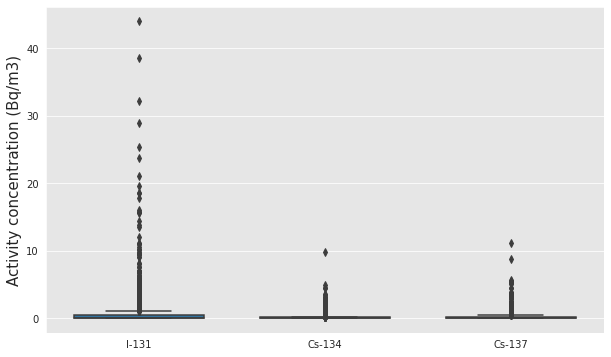

In [39]:
# plotting a boxplot graph
plt.figure(figsize=(10,6))
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
xx1 = sns.boxplot(data=merge_df, width=.7, showfliers=True)
xx1.set_ylabel('Activity concentration (Bq/m3)',fontsize=15)
plt.show()

From this boxplots, we can confirm that the dataset has most of its values < 10 Bq/m³, and that Iodine-131 has the highest activity concentration reported.

<b>The IAEA report on the Chernobyl disaster [1] corroborates with this finding: *\"In the early period after the accident, the radionuclide of most radiological concern was I-131; later, the emphasis shifted to Cs-137.\"* </b>

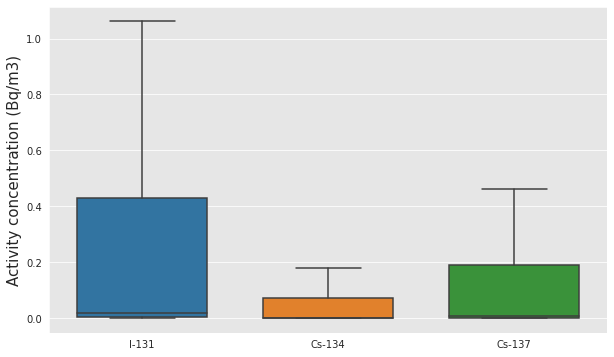

In [40]:
# plotting a boxplot graph, hidding the flier values
plt.figure(figsize=(10,6))
xx1 = sns.boxplot(data=merge_df, width=.7, showfliers=False)
xx1.set_ylabel('Activity concentration (Bq/m3)',fontsize=15)
plt.show()

**By hiding the fliers, we can visualize that the majority of values are lower than 1 Bq/m³.**

Also, that Iodine-131 has the highest average activity concentrations values between the isotopes for the whole time frame of our dataset.

**Now, we will check the amount of measurements that were made per day for all localities.**

In [41]:
# creating a new df to get only the dates and the sum of measurements reported on that date
dates_data = df.pivot_table(index = ['date'], aggfunc ='size') 
dates_df = pd.DataFrame(data=dates_data)
dates_df = dates_df.rename(columns={0: 'measurements per day'})
dates_df = dates_df.reset_index()

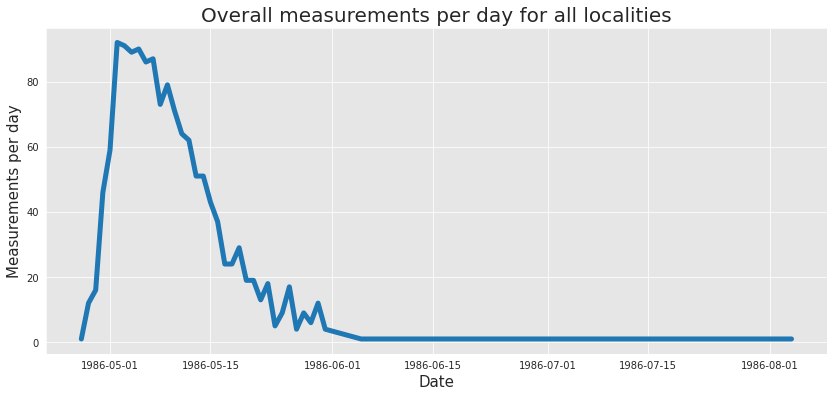

In [42]:
# creating the lineplot graph
plt.figure(figsize=(14,6))
xx1 = sns.lineplot(x=(dates_df['date']),y = dates_df['measurements per day'], lw=5)
# creating a date array with the dates column of the df
xx1.axes.set_title('Overall measurements per day for all localities',fontsize=20)
xx1.set_xlabel('Date',fontsize=15);
xx1.set_ylabel('Measurements per day',fontsize=15);
plt.show()

**From the previous lineplot, it's possible to visualize that the overall highest amount of measurements were made in the two months after the accident, which happened on 1986-04-26.**

For that reason, the focus of our analysis is going to be only on the first 60 days after the accident.

In [43]:
# creating new dataframe to evaluate a time frame of 60 days.
early_df = df.reset_index(level='date')
early_df = early_df[(early_df['date'] > '1986-04-01') & (early_df['date'] < '1986-06-01')]

# checking latest date of the new dataframe
early_df['date'].max()

Timestamp('1986-05-31 00:00:00')

**Now, we can also check which country has the highest number of overall measurements for the period.**

Checking the total number of reported measurements per country.

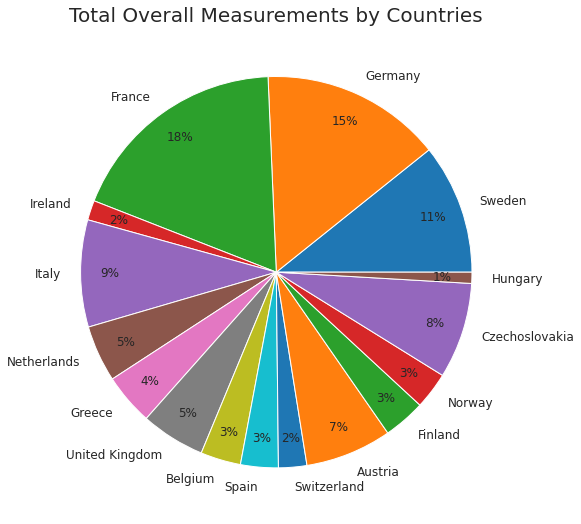

In [44]:
# creating new dataframe with the countries and the sum of its reported measurements
country_measurements_df = df.pivot_table(index = ['country'], aggfunc ='size') 
# creating pie chart
fig1 = plt.figure(figsize=(9,9))
ax1 = country_measurements_df.plot(kind='pie', startangle=0, legend=False, fontsize=12, autopct='%.0f%%', pctdistance=0.85, rotatelabels=False, label='')
plt.title('Total Overall Measurements by Countries', fontsize=20)
plt.show()
# saving piechart
fig1.savefig('piechart.png')

**From the pie chart, it's easier to visualize which countries made the most measurements up to 60 days after the accident happened.**

**We can also verify which countries reported the highest activity concentration in the first 60 days.**

In [45]:
# creating new dataframe to get only the countries and isotopes columns
per_country = early_df.reset_index()
per_country = per_country[['country', 'iodine131', 'caesium134', 'caesium137']]
per_country = per_country.groupby(['country']).sum()

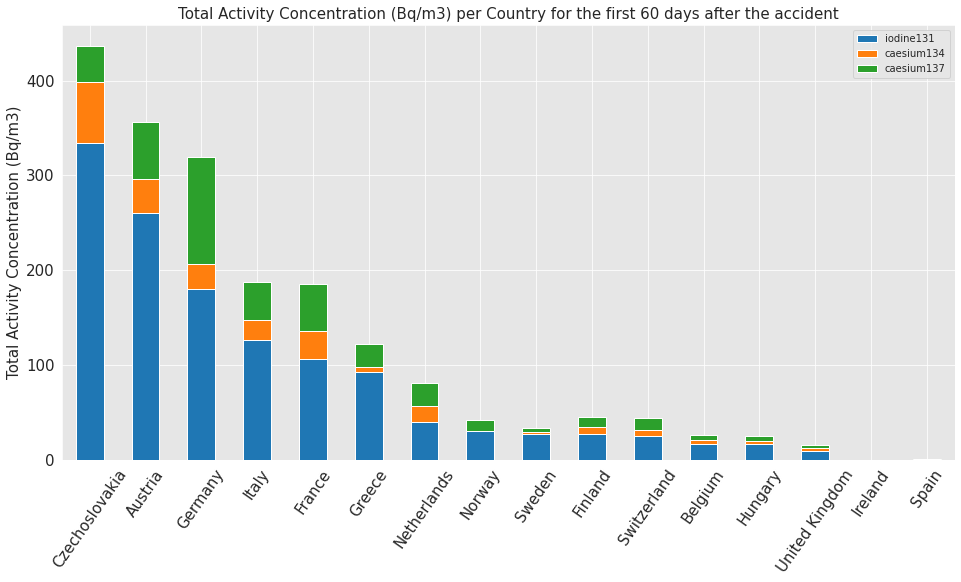

In [46]:
# generating bar plot
ax1 = per_country.sort_values('iodine131', ascending=False).plot(kind='bar', subplots=False,
                 sharex=True, sharey=True, title=(''), xlabel='', ylabel='', use_index=True,
                 legend=True, fontsize=15, stacked=True, figsize=(16,8), rot=55)
plt.title('Total Activity Concentration (Bq/m3) per Country for the first 60 days after the accident', fontsize=15)
ax1.set_ylabel('Total Activity Concentration (Bq/m3)',fontsize=15)
plt.show()
# saving bar plot using pandas graph plotting
fig = ax1.get_figure()
fig.savefig('countries.png', bbox_inches='tight')

**Czechoslovakia* has shown the highest amount of the Total Activity Concentration among all countries.**

We can further investigate this by checking the total activity concentration per localities.

\* *- Czechoslovakia existed at that moment (1986), since Czechia and Slovakia were not two independent countries yet.*

In [47]:
# creating new dataframe to get only the localities and isotopes columns
per_locality = early_df.reset_index(drop=False)
per_locality = per_locality[['locality', 'iodine131', 'caesium134', 'caesium137']]
per_locality = per_locality.groupby('locality').sum()
per_locality = per_locality.sort_values('iodine131', ascending=False)

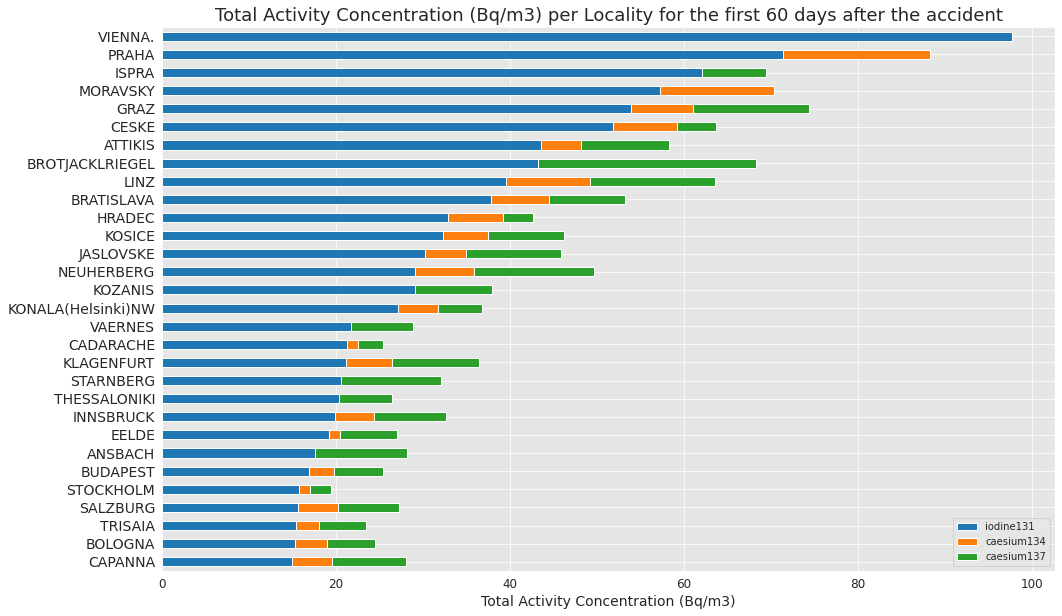

In [48]:
# generating horizontal bar plot
ax1 = per_locality.sort_values('iodine131', ascending=True).iloc[65:95].plot(kind='barh',
                                 y=['iodine131', 'caesium134','caesium137'],
                                 stacked=True, subplots=False, layout=(3,1),
                                 figsize=(16,10),
                                 ylabel='',
                                 xlabel='',
                                 fontsize='12',
                                 title=('')
                                )
plt.yticks(fontsize=14)
plt.title('Total Activity Concentration (Bq/m3) per Locality for the first 60 days after the accident', fontsize=18)
ax1.set_xlabel('Total Activity Concentration (Bq/m3)',fontsize=14);
plt.show()
# saving bar plot using pandas graph plotting
fig = ax1.get_figure()
fig.savefig('localities.png', bbox_inches='tight')

**From the previous bar plot, we can visualize that Vienna (Austria) has the highest total activity concentration among all localities, followed by Praha (Czechoslovakia*) and Graz (Austria).**

In [49]:
# creating divided dataframes to plot one graph for each isotope.
early_df = early_df.reset_index()
per_locality_i131 = early_df[['locality', 'iodine131']]
per_locality_i131 = per_locality_i131.groupby('locality').sum().sort_values('iodine131', ascending=False).iloc[0:20]
per_locality_cs134 = early_df[['locality', 'caesium134']]
per_locality_cs134 = per_locality_cs134.groupby('locality').sum().sort_values('caesium134', ascending=False).iloc[0:20]
per_locality_cs137 = early_df[['locality', 'caesium137']]
per_locality_cs137 = per_locality_cs137.groupby('locality').sum().sort_values('caesium137', ascending=False).iloc[0:20]

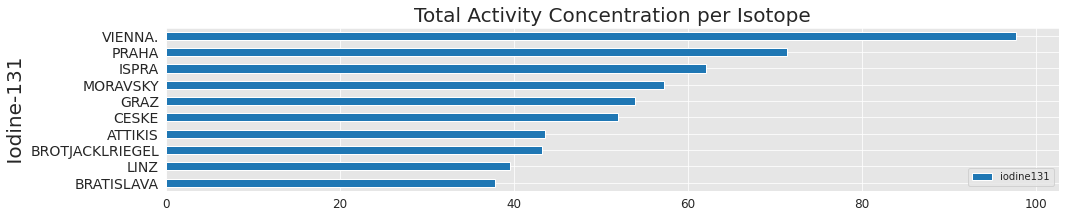

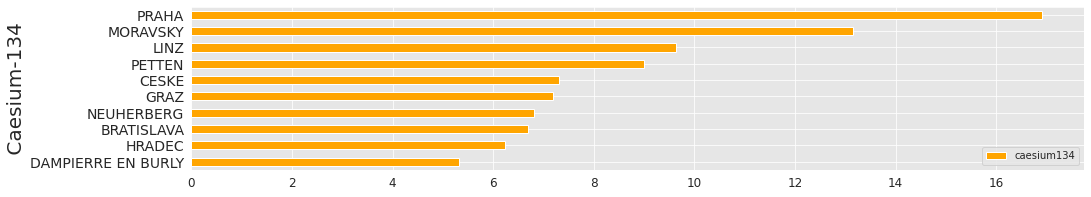

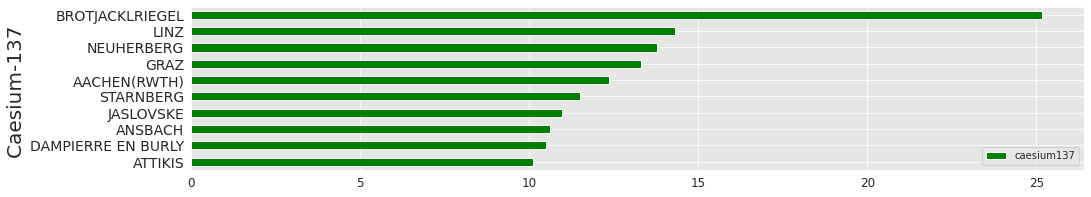

In [50]:
# generating three individual horizontal bar plots to visualize the influence of each radioisotope
ax1 = per_locality_i131.iloc[0:10].sort_values('iodine131').plot(kind='barh', color=None, figsize=(16,3), fontsize='14')
ax1.set_title('Total Activity Concentration per Isotope',fontsize=20);
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel(' Iodine-131 ', fontsize='20')
ax2 = per_locality_cs134.iloc[0:10].sort_values('caesium134').plot(kind='barh', color='orange', figsize=(16,3), fontsize='14')
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel(' Caesium-134 ', fontsize='20')
ax3 = per_locality_cs137.iloc[0:10].sort_values('caesium137').plot(kind='barh', color='green', figsize=(16,3), fontsize='14')
plt.xticks(fontsize=12)
plt.xlabel('', fontsize='15')
plt.ylabel('Caesium-137 ', fontsize='20')
plt.show()

**From this plot, we can visualize which regions detected the highest values per isotope type for the period of 60 days.**

**Now, we will find the distance between locations using its coordinates and relate it to the highest reported activity concentrations.**

In [51]:
coord_df = df.reset_index(drop=False)
coord_df = coord_df[['country','locality','latitude','longitude']]
# fixing very wrong coordinate values for VALENCIA and VAERNES (reported values were zeros).
# coord_df[coord_df['locality'] == 'VALENCIA']
coord_df.at[84, 'latitude'] = '39.5'
coord_df.at[84, 'longitude'] = '-0.4'
coord_df.at[85, 'latitude'] = '63.5'
coord_df.at[85, 'longitude'] = '10.9'

In [52]:
coord_df = coord_df.set_index(['locality'])

In [53]:
# chernobyl power plant coordinates Latitude: 51.4  / Longitude: 30.1
cherno_coord = (51.4, 30.1)
# checking distance between Chernobyl and the highest activity localities (Vienna, Praha and Brotjacklriegel).
# getting locality coordinates from df
brot_coord = coord_df.loc['VIENNA.'].mean()
cesk_coord = coord_df.loc['PRAHA'].mean()
atti_coord = coord_df.loc['BROTJACKLRIEGEL'].mean()

print ('The distance between Chernobyl\'s power plant and the localities are {:.0f}km for Vienna, {:.0f}km for Praha and {:.0f}km for Brotjacklriegel.'.format((geopy.distance.distance(cherno_coord, brot_coord).km),(geopy.distance.distance(cherno_coord, cesk_coord).km),(geopy.distance.distance(cherno_coord, atti_coord).km)))

The distance between Chernobyl's power plant and the localities are 1049km for Vienna, 1116km for Praha and 1345km for Brotjacklriegel.


**We can better visualize the relationship between distances and total activity concentration by plotting a few graphs.**

In [54]:
coord_df = coord_df.reset_index(['locality'])

In [55]:
#latitude and longitude values for the Chernobyl's power plant
cherno_coord = (51.4, 30.1)

#calculating the distance between each location and chernobyl, then appending to a new dataframe
dist_km = []

for index, row in coord_df.iterrows():
   # if index >= 0:
        x = geopy.distance.distance(cherno_coord, (row[2],row[3])).km
        dist_km.append(x)

coord_df['dist_km'] = dist_km
coord_df = coord_df.groupby('locality').mean().sort_values('dist_km')
dist_df = coord_df['dist_km']

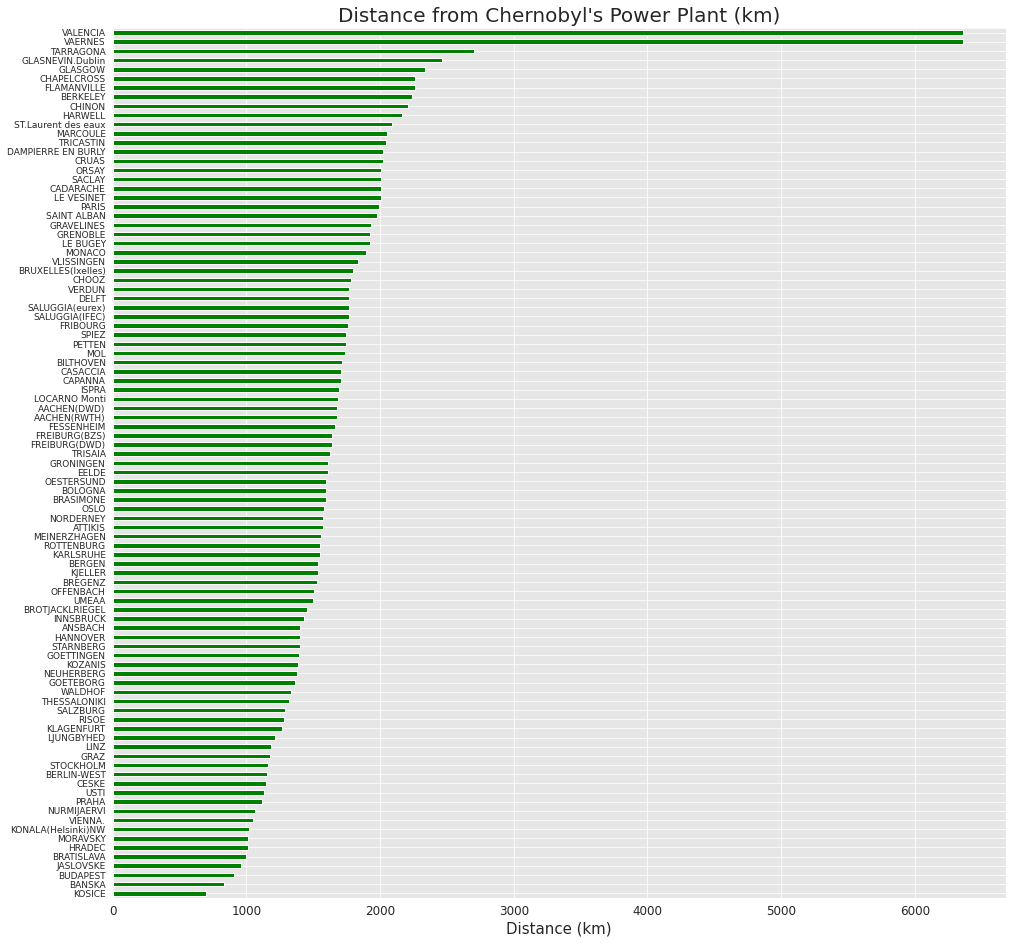

In [56]:
ax1 = dist_df.iloc[0:95].plot(kind='barh', color='green', figsize=(16,16), fontsize='9')
ax1.set_title('Distance from Chernobyl\'s Power Plant (km)',fontsize=20);
plt.xticks(fontsize=12)
plt.xlabel('Distance (km)', fontsize='15')
plt.ylabel('', fontsize='0')
plt.show()

In [57]:
# creating new df to calculate total activity / distance
dist_all_df = (early_df.groupby('locality').mean())
# fixing wrong coordinate values for VALENCIA and VAERNES (reported values were zeros).
dist_all_df = dist_all_df.reset_index()
dist_all_df.at[90, 'latitude'] = '39.5'
dist_all_df.at[90, 'longitude'] = '-0.4'
dist_all_df.at[89, 'latitude'] = '63.5'
dist_all_df.at[89, 'longitude'] = '10.9'

In [58]:
# creating new dataframe to calculate the distances
dist_all_df = dist_all_df.set_index('locality')
dist_all_df['dist_km'] = coord_df['dist_km']
dist_all_df['total_bq'] = dist_all_df['iodine131'] + dist_all_df['caesium134'] + dist_all_df['caesium137'] 
dist_all_df['bq_per_dist'] = dist_all_df['total_bq'] / dist_all_df['dist_km']
dist_all_df = dist_all_df.sort_values('bq_per_dist')

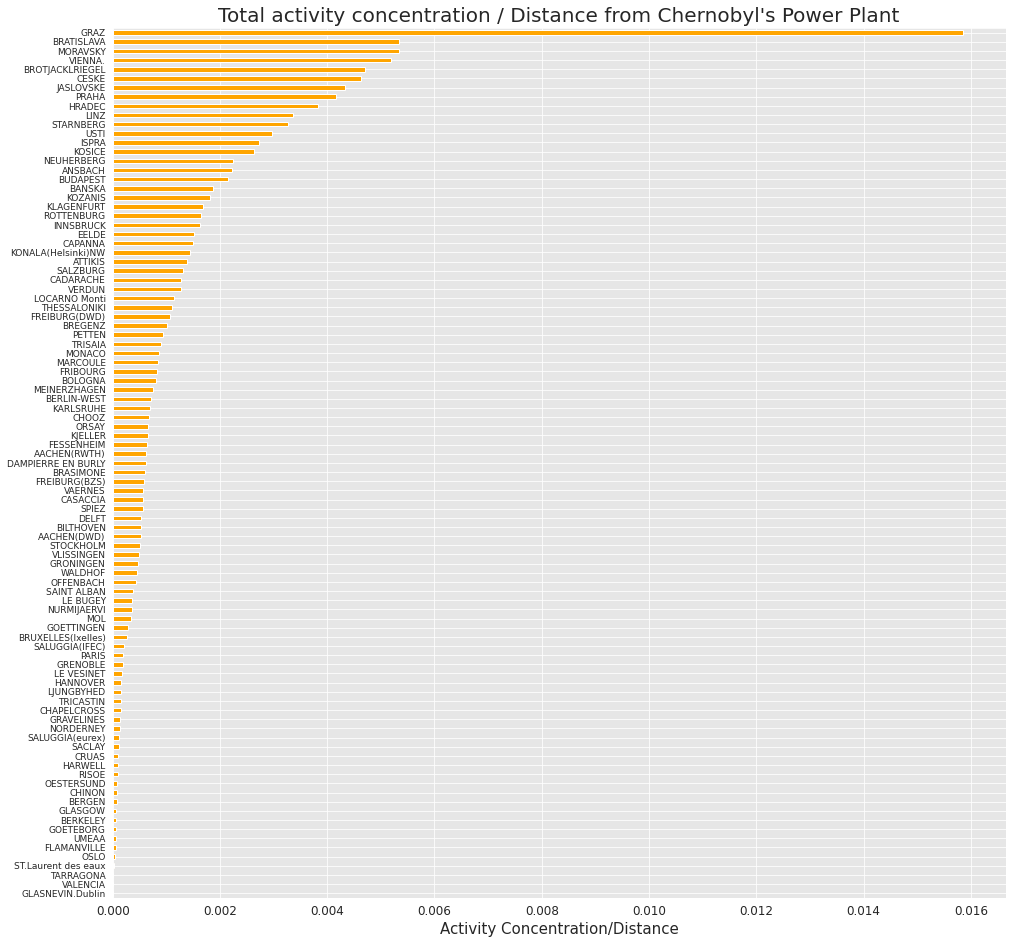

In [59]:
# generating a horizontal bar plot
ax1 = dist_all_df['bq_per_dist'].plot(kind='barh', color="orange", figsize=(16,16), fontsize='9')
ax1.set_title('Total activity concentration / Distance from Chernobyl\'s Power Plant',fontsize=20);
plt.xticks(fontsize='12')
plt.xlabel('Activity Concentration/Distance', fontsize='15')
plt.ylabel('', fontsize='0')
plt.show()

**From the Total activity concentration/Distance we can view that, except for Graz (Austria), all other localities follow a ratio bellow 0.006.**

This raises suspicion for the data reported at the Graz locality. Further investigation is necessary to explain the cause of that ratio being much higher than the rest of the localities. We will get into more details later in the  `Inferences and Conclusion` section.

## III - Asking and Answering Questions

**Q1 - How many days did it take to reach the maximum reported Activity Concentration for each isotope?**

To answer this question, we can check how the isotopes activity concentrations changed in time by making a line plot.

In [60]:
# creating new dataframe to analyze the change in time
time_df = early_df
time_df = time_df.groupby('date').sum()
time_df = time_df.reset_index(drop=False)
time_df = time_df.drop(columns=['country_code','longitude','latitude'])
time_df = time_df.rename(columns={'iodine131': 'I-131', 'caesium134': 'Cs-134', 'caesium137': 'Cs-137'})

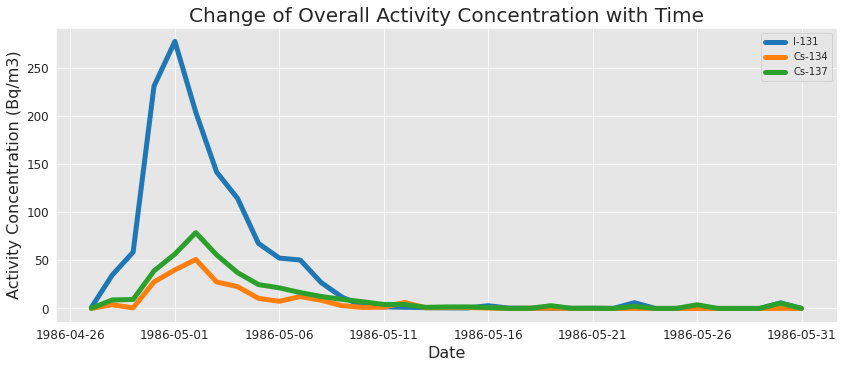

In [61]:
# generating line plot
x = time_df['date']
y1 = time_df['I-131']
y2 = time_df['Cs-134']
y3 = time_df['Cs-137']
plt.figure(figsize=(14,6))
# changing date columns to plot date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
# plotting each isotope
plt.plot(x,y1, linewidth=5)
plt.plot(x,y2, linewidth=5)
plt.plot(x,y3, linewidth=5)
# plot settings
plt.gca().legend(('I-131','Cs-134','Cs-137'))
plt.ylabel('Activity Concentration (Bq/m3)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Change of Overall Activity Concentration with Time', fontsize=20)
# show plot
plt.show()

**A1 - From the previous plot, we can visualize that Iodine-131 gets to the maximum value at May 1st, which is 5 days after the Chernobyl's accident, followed by Caesium-134 and Caesium-137 on the next day.**

**Q2 - Which countries reported the most measurements in this dataset?**

*To answer this question, we can check a pie chart that was generated in the* `Exploratory Analysis and Visualization` *section:*

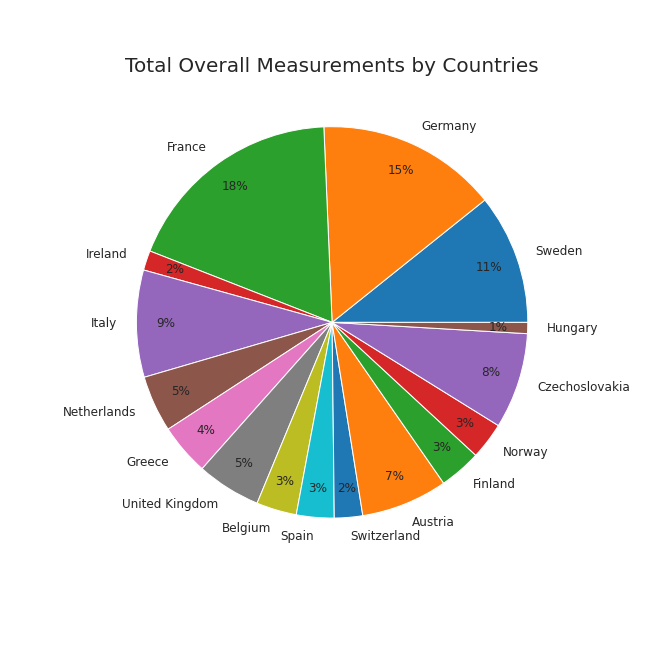

In [62]:
# displaying image from saved files
Image(filename='piechart.png', width=600)

**A2 - From the pie chart generated before, we can visualize that France, Germany and Sweden are the regions that reported the most measurements, respectively.**

**Q3 - Which Country and Locality/Region reported the highest total activity concentration values?**

*Being the nearest country to Ukraine in our dataset, it's reasonable to presume that Czechoslovakia had the highest reported exposure to the radioisotopes. This presumption can be confirmed by checking a graph plotted at the* `Exploratory Analysis and Visualization` *section:*

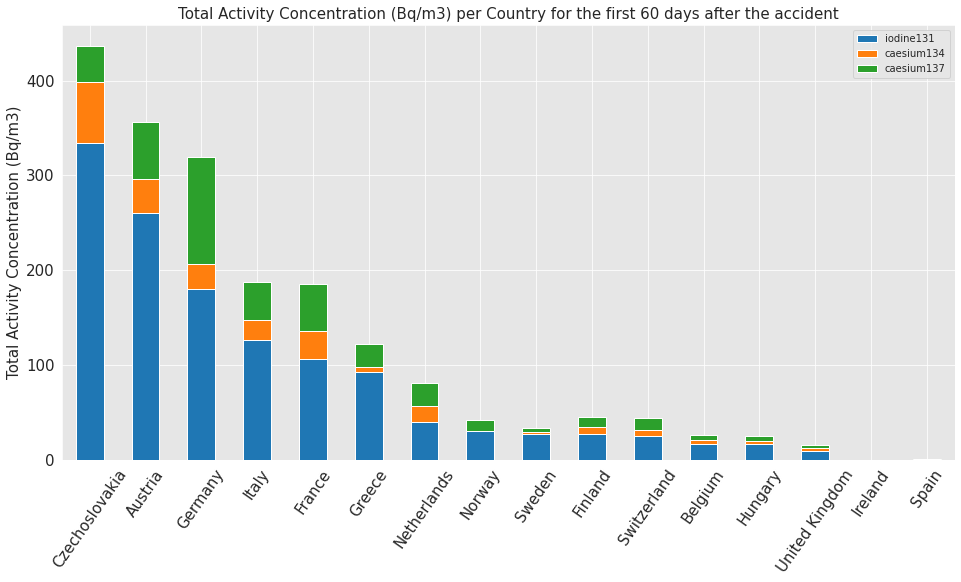

In [63]:
# displaying image from saved files
Image(filename='countries.png', width=600) 

*Moreover, to check which locality/region has the highest reported overall values, we can check the following graph that was also plotted at the* `Exploratory Analysis and Visualization` *section:*

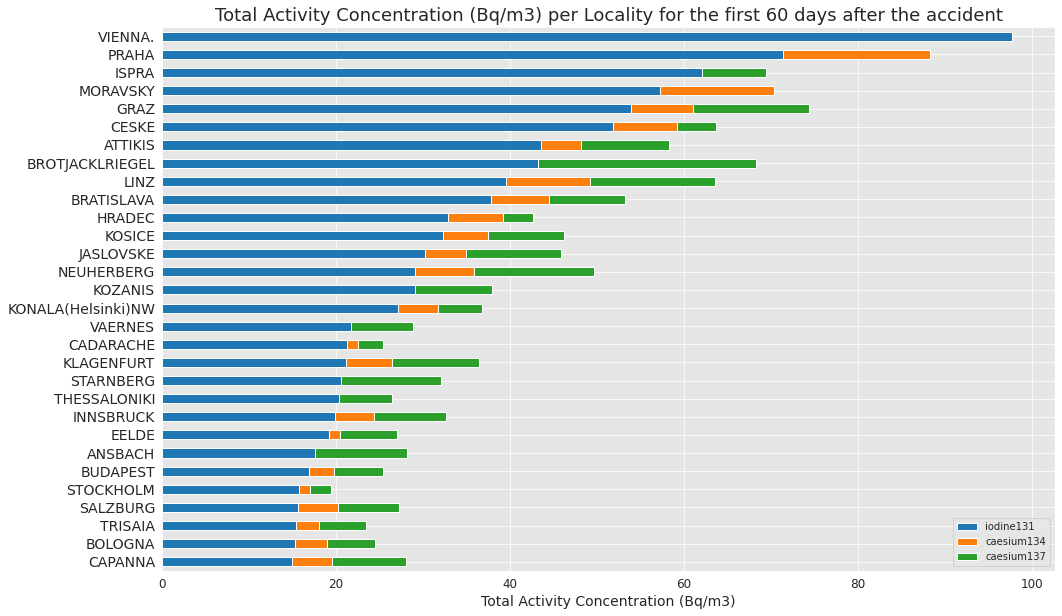

In [64]:
# displaying image from saved files
Image(filename='localities.png', width=600) 

**A3 - From the previous plots, we can confirm that, for our dataset, the country and locality/region that reported the highest total activity concentration is Czechoslovakia and Vienna (Austria), respectively.**

**Q4 - How's the distribution of localities/regions that reported measurements in this dataset?**

*We can generate a map to visualize the reported locations from the dataset:*

In [65]:
# creating new dataframe to generate map
map_df = dist_all_df.reset_index()
# fixing very wrong coordinate values for VALENCIA and VAERNES (reported lat/long values were zeros).
map_df.at[1, 'latitude'] = '39.5'
map_df.at[1, 'longitude'] = '-0.4'
map_df.at[44, 'latitude'] = '63.5'
map_df.at[44, 'longitude'] = '10.9'

In [72]:
from ipyleaflet import MarkerCluster
# creating list to setup the coordinates for each location marker on the map
longitudes = map_df['longitude'].values.tolist()
latitudes = map_df['latitude'].values.tolist()
markers = []
for index, row in map_df.iterrows():
    locality = row[0]
    lat = row[3]
    lon = row[2]
    markers.append(Marker(location=(lat, lon), riseonrover=True, draggable=False, title=locality))
m = Map(basemap=basemaps.Esri.WorldTopoMap, center=(np.mean(lat), np.mean(lon)), zoom=3)
marker_cluster = MarkerCluster(markers=markers)
m.add_layer(marker_cluster);
# adding scale reference and fullscreen control to the map
m.add_control(ScaleControl(position='topright'))
m.add_control(FullScreenControl())
# creating an icon to locate chernobyl's power plant
icon = Icon(icon_url='https://e7.pngegg.com/pngimages/823/668/png-clipart-radioactive-decay-ionizing-radiation-trefoil-hazard-symbol-symbol-miscellaneous-sign.png', icon_size=[35, 25], icon_anchor=[-20,10])
cherno_marker = Marker(location=(51.4, 30.1), draggable=False, title='Chernobyl Power Plant', icon=icon);
m.add_layer(cherno_marker);
# creating a popup message
message1 = HTML()
message1.value = "<center>View in <b>Fullscreen</b> for <br>a better experience!</center>"
# popup with a given location on the map:
popup = Popup(location=(57.5, -30),child=message1,close_button=True,auto_close=False,close_on_escape_key=False)
m.add_layer(popup)
# plot map
display(m)

Map(center=[47.08, 15.36], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [73]:
from folium.plugins import MarkerCluster
# generating map using Folium
m = folium.Map(location=[np.mean(lat), np.mean(lon)],tiles='Cartodb Positron',zoom_start=3, control_scale = True)
# creating markers for each locality
marker_cluster = MarkerCluster(name='Reported Localities',overlay=True,control=False,icon_create_function=None)
longitudes = map_df['longitude'].values.tolist()
latitudes = map_df['latitude'].values.tolist()
for index, row in map_df.iterrows():
    locality = row[0]
    lat = row[3]
    lon = row[2]
    location = lat, lon
    marker = folium.Marker(location=location, tooltip=locality)
    marker_cluster.add_child(marker)    
marker_cluster.add_to(m)
# creating an icon to locate chernobyl's power plant
icon = folium.features.CustomIcon('https://e7.pngegg.com/pngimages/823/668/png-clipart-radioactive-decay-ionizing-radiation-trefoil-hazard-symbol-symbol-miscellaneous-sign.png', icon_size=(30,20))
folium.Marker([51.4, 30.1],popup=None,icon=icon,tooltip='Chernobyl Power Plant').add_to(m)
folium.plugins.Fullscreen(position='topleft', title='Full Screen', title_cancel='Exit Full Screen', force_separate_button=False).add_to(m)
# display map
m

**A4 - From the map shown above, we can visualize that most of the data reported on this dataset comes from Central and Western Europe regions, but the dataset has measurements reported from the north of Norway and Sweden to the east of Spain.**

**Q5 - For the localities reported in this dataset, which region of Europe was affected the most by the radioisotopes released in the Chernobyl disaster?**

In [74]:
# creating new dataframe to generate a heatmap
heatmap_df = map_df[['latitude', 'longitude', 'total_bq']].copy(deep=False)
# multiplying column to increase intensity on the heatmap for better visibility
heatmap_df['total_bq'] = (heatmap_df['total_bq']*1000)

In [75]:
# generating a heatmap using Ipyleaflet
m = Map(basemap=basemaps.Esri.WorldTopoMap, center=(latitudes[11], longitudes[6]), zoom=3)
# heatmap setup
heatlocations = heatmap_df.values.tolist()
heat = Heatmap(locations=heatlocations, radius=30, blur=20)
m.add_layer(heat)
# heatmap properties and color gradient
heat.radius = 15
heat.blur = 35
heat.max = 0.5
heat.gradient = {0.0: 'navy', 0.2: 'blue', 0.3: 'cyan', 0.4: 'yellow', 0.7: 'red', 0.9: 'firebrick', 1.0: 'darkred'}
# adding scale reference and fullscreen control to the map
m.add_control(FullScreenControl())
m.add_control(ScaleControl(position='topright'))
# creating an icon to locate chernobyl's power plant
icon = Icon(icon_url='https://e7.pngegg.com/pngimages/823/668/png-clipart-radioactive-decay-ionizing-radiation-trefoil-hazard-symbol-symbol-miscellaneous-sign.png', icon_size=[35, 25], icon_anchor=[-20,10])
cherno_marker = Marker(location=(51.4, 30.1), draggable=False, title='Chernobyl Power Plant', icon=icon);
m.add_layer(cherno_marker);
# creating a popup message
message1 = HTML()
message1.value = "<center>View in <b>Fullscreen</b> for <br>a better experience! </center>"
# popup with a given location on the map:
popup = Popup(
    location=(57.5, -30),
    child=message1,
    close_button=True,
    auto_close=False,
    close_on_escape_key=False)
m.add_layer(popup)
# plot map
m

Map(center=[47.149999999999984, 20.25], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_ti…

In [76]:
# generating map using Folium
m = folium.Map(location=[np.mean(lat), np.mean(lon)], zoom_start=3, control_scale = True)
folium.TileLayer('cartodbpositron').add_to(m)
# heatmap properties and color gradient
folium.plugins.HeatMap(heatlocations, name=None, min_opacity=0.4, max_zoom=18, max_val=1.0, radius=15, blur=35, gradient={0.0: 'navy', 0.2: 'blue', 0.3: 'cyan', 0.4: 'yellow', 0.7: 'red', 0.9: 'firebrick', 1.0: 'darkred'}, overlay=True, control=True, show=True).add_to(m)
# creating an icon to locate chernobyl's power plant
icon = folium.features.CustomIcon('https://e7.pngegg.com/pngimages/823/668/png-clipart-radioactive-decay-ionizing-radiation-trefoil-hazard-symbol-symbol-miscellaneous-sign.png', icon_size=(30,20))
folium.Marker([51.4, 30.1],popup=None,icon=icon,tooltip='Chernobyl Power Plant').add_to(m)
folium.plugins.Fullscreen(position='topleft', title='Full Screen', title_cancel='Exit Full Screen', force_separate_button=False).add_to(m)
# display map
m

**A5 - From the heatmap, which its intensity scale is made only from the reported locations of our dataset, we can visualize that most of the radioisotopes concentration were measured in Central Europe with the peaks being between Austria's and Czechoslovakia's regions.**

## IV - Inferences and Conclusion

<div style="text-align: justify"> <i> This project has shown an analysis of the Chernobyl Disaster influence in Air Contamination using the <u>Chernobyl Air Concentration Dataset</u>, which was extracted from the REM data bank at CEC Joint Research Centre Ispra [3] and is also available on Kaggle's data bank [4]. </i> </div>

- <div style="text-align: justify"> The impacts of the Chernobyl disaster are still controversial to this day. The damage caused to the fauna and flora can be noticed not only close to the power plant, but also in several other regions of Europe.</div> <br>

- <div style="text-align: justify"> From our analysis, we were able to assess <u>how far and quickly</u> the pollution happened through the spread of radioactive particles in the air and which countries and regions were most affected by it. We could verify that, in just a few days, there were already high concentrations of radioisotopes being detected in European regions very far from the power plant's location.</div> <br>
    
- <div style="text-align: justify"> Another interesting find of our analysis was the realization that a locality in <u>Austria (Graz)</u>, which is relatively farther than other regions in the dataset, has measured much higher activity concentration values than those regions. Checking the literature on the Chernobyl disaster to verify if that big difference was due to wrong values reported in the dataset, we were able to confirm that this information is indeed what happened.</div> <br>
    
- <div style="text-align: justify"> A report from the International Atomic Energy Agency (IAEA) on the Chernobyl accident [1] states that, even though the three most affected countries were Belarus, the Russian Federation, and Ukraine, due to wet deposition processes, there were also <u>major contaminated areas in Austria</u> and other close countries. In those regions, a radioactive plume from Chernobyl coincided with rainfall, releasing a much greater total radioactive deposition than other countries.</div> <br>
    
- <div style="text-align: justify"> Other scientific papers, like the study of the contamination of Austrian soil with Caesium-137 [2] published in 2001, corroborate with that information. Those studies were of great value to this analysis and <u>we recommend reading them if one decides to get more details in the subject</u>.</div>

<small> This project was done as part of the *Data Analysis with Python: Zero to Pandas* Course, lectured by Aakash N. S., and hosted on https://jovian.ml. </small>

## References

- [1] International Atomic Energy Agency (IAEA), Environmental Consequences  of the Chernobyl Accident and their Remediation: Twenty Years of Experience, 2006, URL: https://www-pub.iaea.org/MTCD/publications/PDF/Pub1239_web.pdf
- [2] Bossew, P. *et al.*, Contamination of Austrian soil with caesium-137, 2001, URL: https://doi.org/10.1016/S0265-931X(00)00192-2
- [3] Radioactivity Environmental Monitoring (REM), Data Bank, 2020, URL: https://rem.jrc.ec.europa.eu/RemWeb/Browse.aspx?path=Chernobyl%20Data
- [4] Kaggle, 2020, URL: https://www.kaggle.com/lsind18/chernobyl-data-air-concentration

## Appendix: Packages and Libraries used in this project

In [1]:
# run the next line to install Pandas
!pip install pandas --upgrade -q
import numpy as np # linear algebra
import pandas as pd # pandas
import datetime as dt # date manipulation
from datetime import timedelta
# graph creation and manipulation
!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
!pip install seaborn --upgrade -q
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, date2num 
import matplotlib.dates as mdates

     |████████████████████████████████| 9.5MB 8.3MB/s 


In [69]:
# display images from source files
from IPython.display import Image
# map creating and editing
!pip install ipyleaflet --upgrade -q
!pip install traitlets --upgrade -q
import ipyleaflet
from ipywidgets import HTML
from ipyleaflet import (Map, Marker, MarkerCluster, FullScreenControl, Heatmap, ScaleControl, Icon, Popup, basemaps)
!pip install geopy --upgrade -q
import geopy.distance # coordinates distance calculation
!pip install folium --upgrade - q
import folium
from folium.plugins import HeatMap

ERROR: Invalid requirement: '-'


In [77]:
!pip install jovian
import jovian

     |████████████████████████████████| 71kB 5.1MB/s 
  Created wheel for uuid: filename=uuid-1.30-cp36-none-any.whl size=6503 sha256=16582313503ef8c7d11f5c3091266d9ebe39ef7948996d467bf9408437f74b92
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built uuid


In [80]:
jovian.commit(project='chernobyl-analysis')

[jovian] Detected Colab notebook...


[jovian] Error: Colab File Id is not provided


[jovian] Uploading colab notebook to Jovian...


ApiError: ignored

In [ ]:
jovian.commit(files=['chernobyl.csv'])